In [2]:
!pip install kaggle

In [55]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [56]:
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
from zipfile import ZipFile
dataset='/content/face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("the dataset is extracted")


the dataset is extracted


In [9]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [11]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [12]:
with_mask_files=os.listdir('/content/data/with_mask')
print(with_mask_files)
print(with_mask_files[0:5])

['with_mask_2522.jpg', 'with_mask_334.jpg', 'with_mask_1027.jpg', 'with_mask_3434.jpg', 'with_mask_2941.jpg', 'with_mask_1046.jpg', 'with_mask_2535.jpg', 'with_mask_3376.jpg', 'with_mask_2159.jpg', 'with_mask_297.jpg', 'with_mask_1947.jpg', 'with_mask_1431.jpg', 'with_mask_2852.jpg', 'with_mask_2977.jpg', 'with_mask_2604.jpg', 'with_mask_736.jpg', 'with_mask_1060.jpg', 'with_mask_908.jpg', 'with_mask_1826.jpg', 'with_mask_3258.jpg', 'with_mask_1072.jpg', 'with_mask_3426.jpg', 'with_mask_1318.jpg', 'with_mask_1066.jpg', 'with_mask_2190.jpg', 'with_mask_1268.jpg', 'with_mask_1455.jpg', 'with_mask_2023.jpg', 'with_mask_2735.jpg', 'with_mask_1673.jpg', 'with_mask_549.jpg', 'with_mask_3268.jpg', 'with_mask_1896.jpg', 'with_mask_702.jpg', 'with_mask_1836.jpg', 'with_mask_2546.jpg', 'with_mask_181.jpg', 'with_mask_498.jpg', 'with_mask_3588.jpg', 'with_mask_615.jpg', 'with_mask_832.jpg', 'with_mask_3006.jpg', 'with_mask_3091.jpg', 'with_mask_2203.jpg', 'with_mask_2136.jpg', 'with_mask_281.jpg'

In [13]:
without_mask_files=os.listdir('/content/data/without_mask')
print(without_mask_files)
print(without_mask_files[0:5])

['without_mask_375.jpg', 'without_mask_1498.jpg', 'without_mask_1626.jpg', 'without_mask_2480.jpg', 'without_mask_560.jpg', 'without_mask_1878.jpg', 'without_mask_2826.jpg', 'without_mask_2108.jpg', 'without_mask_3353.jpg', 'without_mask_2944.jpg', 'without_mask_2922.jpg', 'without_mask_653.jpg', 'without_mask_2481.jpg', 'without_mask_38.jpg', 'without_mask_2887.jpg', 'without_mask_309.jpg', 'without_mask_1414.jpg', 'without_mask_2979.jpg', 'without_mask_1162.jpg', 'without_mask_3475.jpg', 'without_mask_1292.jpg', 'without_mask_2192.jpg', 'without_mask_2155.jpg', 'without_mask_2365.jpg', 'without_mask_894.jpg', 'without_mask_2494.jpg', 'without_mask_2524.jpg', 'without_mask_697.jpg', 'without_mask_1772.jpg', 'without_mask_1103.jpg', 'without_mask_2505.jpg', 'without_mask_50.jpg', 'without_mask_24.jpg', 'without_mask_720.jpg', 'without_mask_3729.jpg', 'without_mask_1702.jpg', 'without_mask_864.jpg', 'without_mask_3692.jpg', 'without_mask_662.jpg', 'without_mask_1436.jpg', 'without_mask_

In [14]:
print("No. of with mask images:",len(with_mask_files))
print("No. of without mask images:",len(without_mask_files))

No. of with mask images: 3725
No. of without mask images: 3828


In [15]:
#with mask-1,without mask-0
with_mask_labels=[1]*3725
without_mask_labels=[0]*3828

In [16]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [17]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [18]:
labels=with_mask_labels+without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


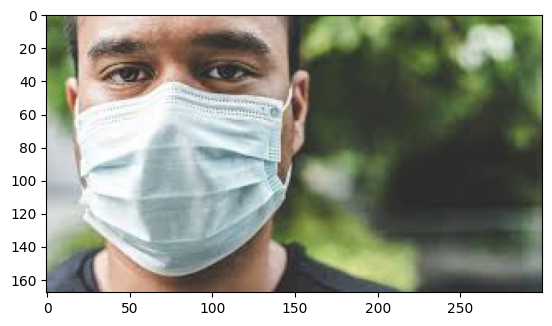

In [19]:
img=mpimg.imread('/content/data/with_mask/with_mask_2522.jpg')
imgplot=plt.imshow(img)
plt.show()

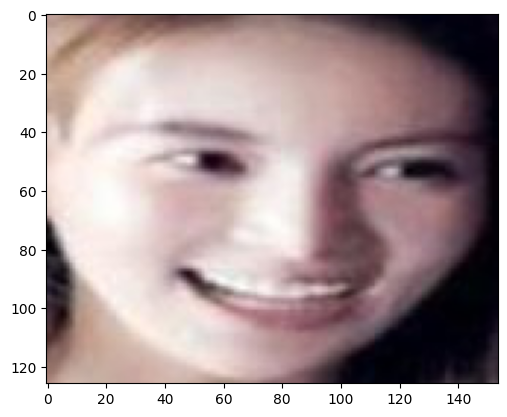

In [20]:
img=mpimg.imread('/content/data/without_mask/without_mask_375.jpg')
imgplot=plt.imshow(img)
plt.show()

In [21]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [22]:
type(data)

list

In [23]:
len(data)

7553

In [24]:
data[0]

array([[[118, 141,  84],
        [110, 136,  76],
        [110, 139,  76],
        ...,
        [144, 182,  99],
        [160, 195, 115],
        [173, 205, 132]],

       [[107, 130,  75],
        [100, 126,  68],
        [101, 129,  68],
        ...,
        [142, 179,  96],
        [158, 193, 112],
        [171, 203, 128]],

       [[ 92, 115,  63],
        [ 88, 114,  57],
        [ 86, 114,  55],
        ...,
        [136, 173,  90],
        [153, 188, 104],
        [166, 199, 121]],

       ...,

       [[115, 128, 145],
        [113, 126, 142],
        [102, 114, 129],
        ...,
        [ 58,  66,  67],
        [ 58,  66,  68],
        [ 56,  64,  68]],

       [[103, 116, 132],
        [105, 118, 134],
        [ 94, 104, 121],
        ...,
        [ 57,  65,  66],
        [ 59,  67,  70],
        [ 59,  67,  71]],

       [[ 96, 109, 125],
        [101, 114, 130],
        [ 91, 103, 118],
        ...,
        [ 57,  65,  67],
        [ 62,  70,  72],
        [ 62,  70,  74]]

In [25]:
type(data[0])

numpy.ndarray

In [26]:
data[0].shape

(128, 128, 3)

In [27]:
X=np.array(data)
Y=np.array(labels)

In [28]:
type(X)

numpy.ndarray

In [29]:
type(Y)

numpy.ndarray

In [30]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [31]:
print(X)

[[[[118 141  84]
   [110 136  76]
   [110 139  76]
   ...
   [144 182  99]
   [160 195 115]
   [173 205 132]]

  [[107 130  75]
   [100 126  68]
   [101 129  68]
   ...
   [142 179  96]
   [158 193 112]
   [171 203 128]]

  [[ 92 115  63]
   [ 88 114  57]
   [ 86 114  55]
   ...
   [136 173  90]
   [153 188 104]
   [166 199 121]]

  ...

  [[115 128 145]
   [113 126 142]
   [102 114 129]
   ...
   [ 58  66  67]
   [ 58  66  68]
   [ 56  64  68]]

  [[103 116 132]
   [105 118 134]
   [ 94 104 121]
   ...
   [ 57  65  66]
   [ 59  67  70]
   [ 59  67  71]]

  [[ 96 109 125]
   [101 114 130]
   [ 91 103 118]
   ...
   [ 57  65  67]
   [ 62  70  72]
   [ 62  70  74]]]


 [[[111 107 121]
   [128 124 138]
   [133 129 143]
   ...
   [ 77  78  76]
   [107 107 105]
   [140 140 138]]

  [[126 122 136]
   [128 124 138]
   [127 123 137]
   ...
   [ 61  62  60]
   [ 78  78  76]
   [100 100  98]]

  [[132 129 143]
   [123 120 134]
   [118 115 129]
   ...
   [ 58  58  56]
   [ 65  64  62]
   [ 73  73

In [32]:
print(Y)

[1 1 1 ... 0 0 0]


In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [34]:
print(X.shape,X_train.shape,X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [35]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [36]:
X_train_scaled[0]

array([[[1.        , 0.91764706, 0.8745098 ],
        [0.88627451, 0.8       , 0.75294118],
        [0.6745098 , 0.58823529, 0.5372549 ],
        ...,
        [0.18823529, 0.16078431, 0.12941176],
        [0.19607843, 0.17647059, 0.14509804],
        [0.2       , 0.18431373, 0.14901961]],

       [[0.65882353, 0.57254902, 0.5254902 ],
        [0.50588235, 0.41960784, 0.36862745],
        [0.29411765, 0.20784314, 0.15686275],
        ...,
        [0.16078431, 0.13333333, 0.10196078],
        [0.18431373, 0.16078431, 0.12941176],
        [0.20392157, 0.18039216, 0.14509804]],

       [[0.43921569, 0.35294118, 0.30196078],
        [0.46666667, 0.38039216, 0.3254902 ],
        [0.49803922, 0.41176471, 0.36078431],
        ...,
        [0.17647059, 0.14117647, 0.10980392],
        [0.18823529, 0.15686275, 0.12156863],
        [0.2       , 0.16470588, 0.12941176]],

       ...,

       [[0.43921569, 0.38039216, 0.29803922],
        [0.30588235, 0.24705882, 0.18431373],
        [0.09803922, 0

In [37]:
#building a cnn
import tensorflow as tf
from tensorflow import keras

In [42]:
num_of_classes = 2     #compiling the network

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))



In [44]:
model.compile(optimizer='adam',                                  #building the network
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])
hist=model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=5)


Epoch 1/5
170/170 [==============================] - 168s 975ms/step - loss: 0.5632 - acc: 0.7464 - val_loss: 0.3148 - val_acc: 0.8711
Epoch 2/5
170/170 [==============================] - 161s 947ms/step - loss: 0.3203 - acc: 0.8759 - val_loss: 0.2680 - val_acc: 0.8810
Epoch 3/5
170/170 [==============================] - 157s 921ms/step - loss: 0.2843 - acc: 0.8849 - val_loss: 0.2442 - val_acc: 0.8909
Epoch 4/5
170/170 [==============================] - 156s 914ms/step - loss: 0.2512 - acc: 0.9027 - val_loss: 0.2468 - val_acc: 0.9058
Epoch 5/5
170/170 [==============================] - 157s 921ms/step - loss: 0.2101 - acc: 0.9228 - val_loss: 0.2112 - val_acc: 0.9058


In [45]:
loss,accuracy=model.evaluate(X_test_scaled,Y_test)
print('The accuracy of the model is:',accuracy)

48/48 [==============================] - 12s 240ms/step - loss: 0.2164 - acc: 0.9040
The accuracy of the model is: 0.9040370583534241


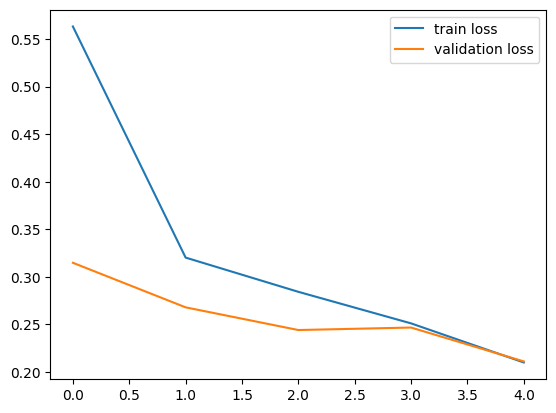

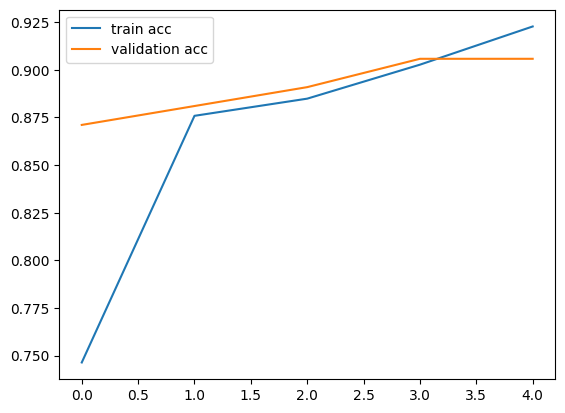

In [47]:
h=hist
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'],label='train acc')
plt.plot(h.history['val_acc'],label='validation acc')
plt.legend()
plt.show()

Path of the image to be predicted: /content/with mask.jpeg


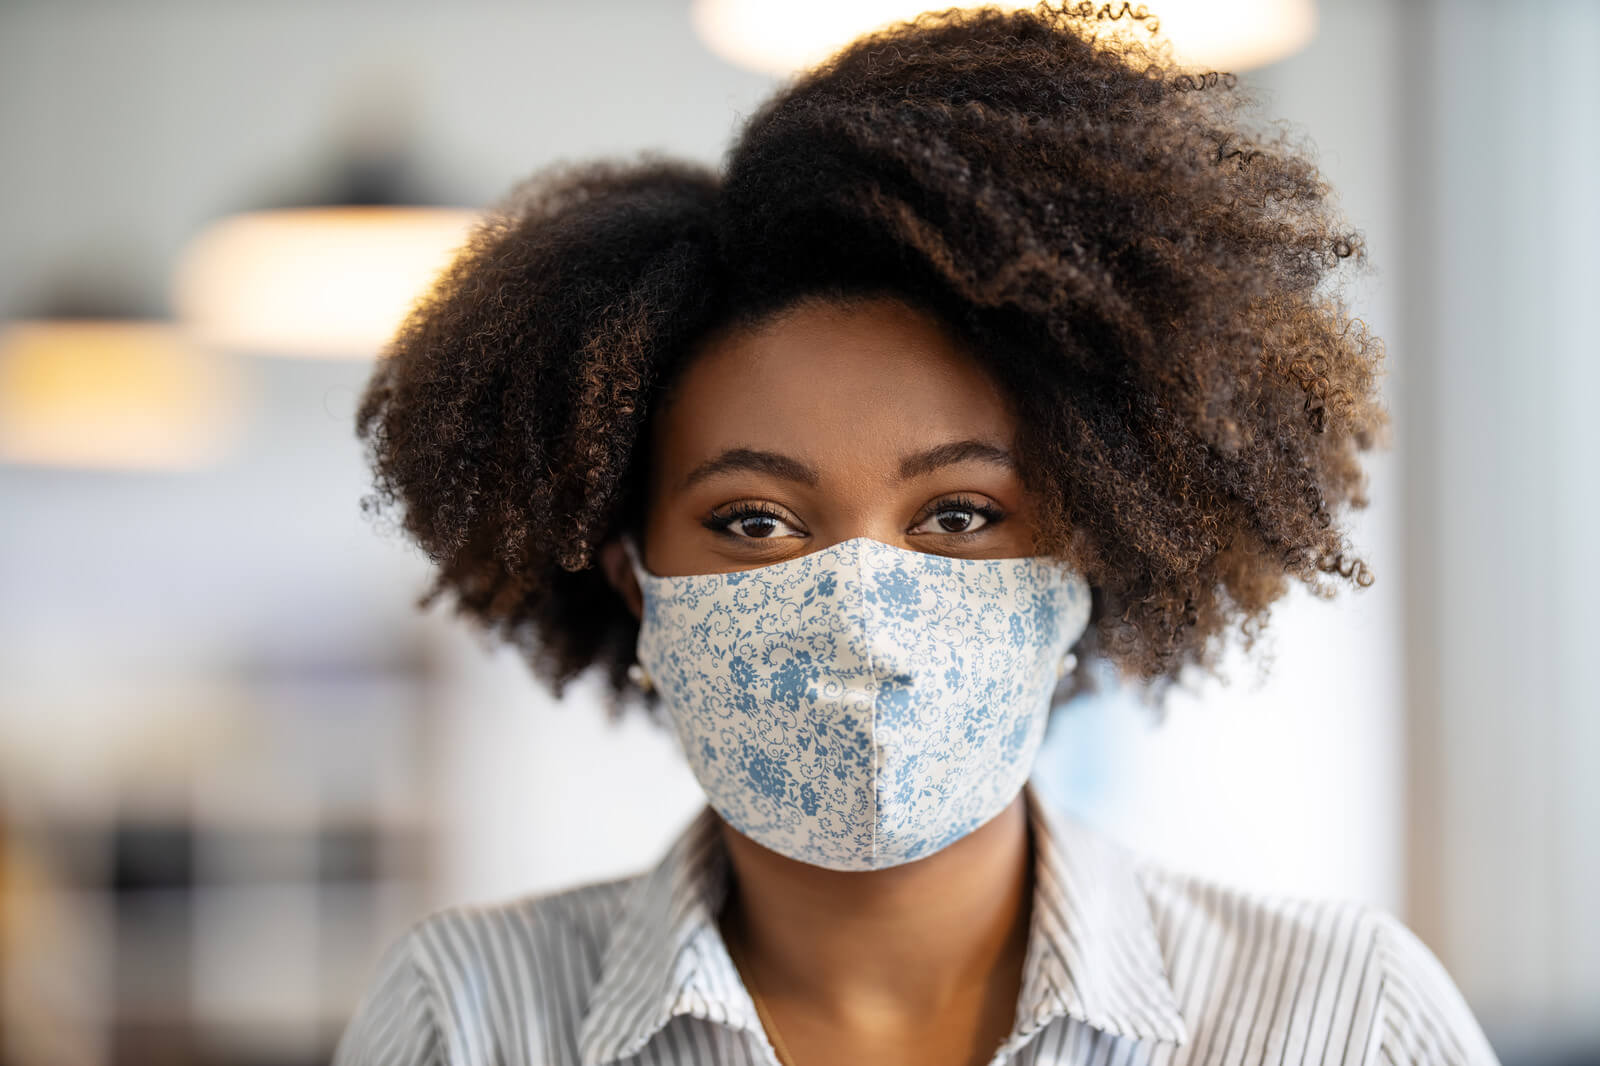

1/1 [==============================] - 0s 51ms/step
[[0.37197706 0.7495623 ]]
1
The person in the image is wearing a mask


In [58]:
#predictive system

input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')